# Non-parametric Methods

In [ ]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import statsmodels.api as sm

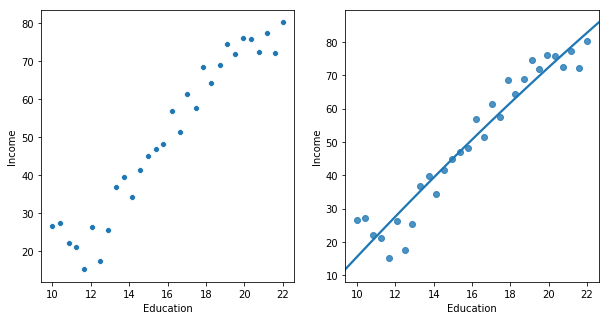

In [3]:
income = pd.read_csv("Income1.csv")
income = income.loc[:,"Education":"Income"]
income.head(4)

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x="Education", y="Income", data=income, ax=ax1)
sns.regplot(x="Education", y="Income", data=income, order=2, ax=ax2, ci=None)

In [134]:
X = (income.
    filter(["Education"])
    )
Y = (income.
    filter(["Income"])
    )

model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     792.0
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.32e-22
Time:                        20:26:50   Log-Likelihood:                -112.25
No. Observations:                  30   AIC:                             226.5
Df Residuals:                      29   BIC:                             227.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Education      3.2517      0.116     28.142      0.000       3.015       3.488
==============================================================================
Omnibus:                        2.087   Durbin-Watson:                   0.333
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                1.736
Skew:                          -0.452   Prob(JB):                        0.420
Kurtosis:                       2.244   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

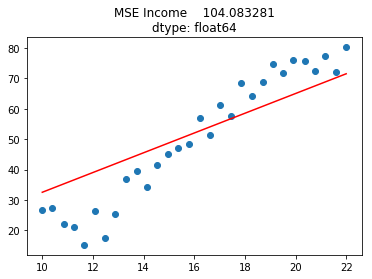

In [135]:
yhat = model.predict(X)

MSE = 1/len(X) * np.sum((Y-(yhat[:,np.newaxis]))**2)

fig, ax = plt.subplots()
ax.set_title("MSE {0}".format(MSE))
ax = plt.scatter(X,Y)
ax = plt.plot(X,yhat, color="red")

In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

poly2 = PolynomialFeatures(degree=2)
poly2 = poly2.fit_transform(X)
poly3 = PolynomialFeatures(degree=3)
poly3 = poly3.fit_transform(X)
poly4 = PolynomialFeatures(degree=4)
poly4 = poly4.fit_transform(X)
poly5 = PolynomialFeatures(degree=5)
poly5 = poly5.fit_transform(X)
poly15 = PolynomialFeatures(degree=10)
poly15 = poly15.fit_transform(X)
poly20 = PolynomialFeatures(degree=15)
poly20 = poly20.fit_transform(X)
poly25 = PolynomialFeatures(degree=20)
poly25 = poly25.fit_transform(X)

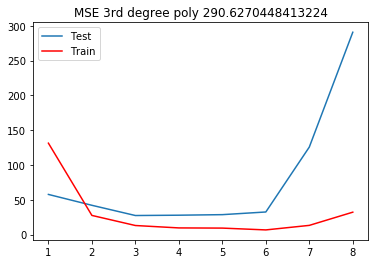

In [119]:
mse = list()
mse2 = list()


for predictor in [X,poly2,poly3,poly4,poly5,poly15,poly20,poly25]:
    train_x, test_x, train_y, test_y = train_test_split(predictor,Y, test_size = .33, random_state = 42)
    model = sm.OLS(train_y,train_x).fit()
    yhat = model.predict(test_x)
    yhat2 = model.predict(train_x)
    
    err = 1/len(test_x) * np.sum((test_y-(yhat[:,np.newaxis]))**2)
    err2 = 1/len(train_x) * np.sum((train_y-(yhat2[:,np.newaxis]))**2)
    
    mse.append(err)
    mse2.append(err2)

fig, ax = plt.subplots()
ax.set_title("MSE 3rd degree poly {0}".format(np.max(mse)))
ax = plt.plot(range(1,9),mse)
ax = plt.plot(range(1,9),mse2, color="red")
ax = plt.legend(labels=["Test","Train"])

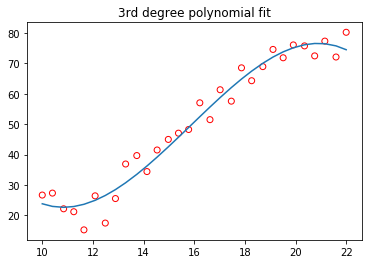

In [102]:
model = sm.OLS(Y,poly3).fit()
yhat = model.predict(poly3)
fig, ax = plt.subplots()
ax.set_title("3rd degree polynomial fit")
ax = plt.scatter(X,Y, color="red", marker='o', facecolors='none', edgecolors='r')
ax = plt.plot(X,yhat)


# Classification - KNN


In [128]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


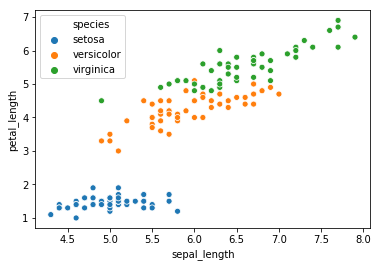

In [154]:
sns.scatterplot(x="sepal_length", y="petal_length", data = data , hue="species")

X = (data
    .filter(["sepal_length","petal_length"])
    )
Y = (data
    .filter(["species"])
    )


C:\Users\svena\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


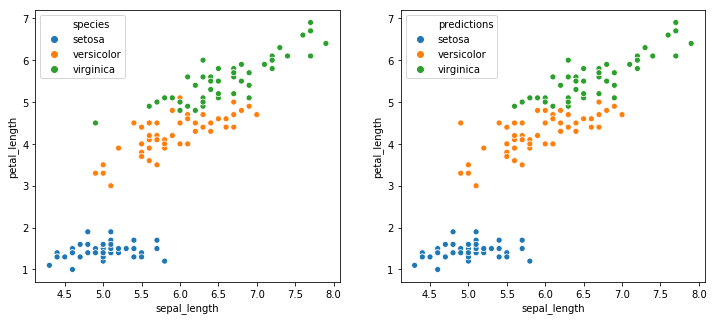

In [211]:
import matplotlib as mpl
from sklearn.neighbors import KNeighborsClassifier

clf =  KNeighborsClassifier(n_neighbors=5)

clf.fit(X,Y)

yhat = clf.predict(X)
yhat = pd.DataFrame(yhat, columns = ["predictions"])

res = pd.concat([data,yhat], axis=1)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1 = sns.scatterplot(x="sepal_length", y="petal_length", data = data , ax=ax1, hue="species")
ax2 = sns.scatterplot(x="sepal_length", y="petal_length", data = res, ax=ax2,   hue="predictions")

# Exercises

## College dataset
i. Use the summary() function to produce a numerical summary
of the variables in the data set.

ii. Use the pairs() function to produce a scatterplot matrix of
the first ten columns or variables of the data. Recall that
you can reference the first ten columns of a matrix A using
A slice*.

iii. Use the plot() function to produce side-by-side boxplots of
Outstate versus Private.

iv. Create a new qualitative variable, called Elite, by binning
the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10% of their high school
classes exceeds 50%.
Use the summary() function to see how many elite universities
there are. Now use the plot() function to produce
side-by-side boxplots of Outstate versus Elite.

v. Use the hist() function to produce some histograms with
differing numbers of bins for a few of the quantitative variables.
You may find the command par(mfrow=c(2,2)) useful:
it will divide the print window into four regions so that four
plots can be made simultaneously. Modifying the arguments
to this function will divide the screen in other ways.

vi. Continue exploring the data, and provide a brief summary
of what you discover.

In [224]:
college = pd.read_csv('College.csv')
''' ex. i.'''
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


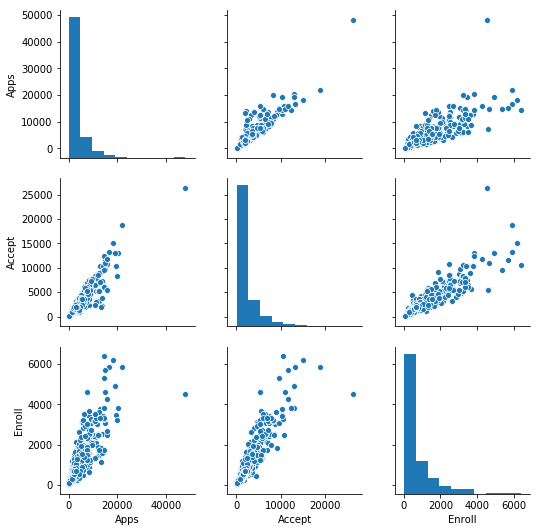

In [216]:
'''ex. ii. But only using 3 columns'''
sns.pairplot(college.loc[:,"Apps":"Enroll"])

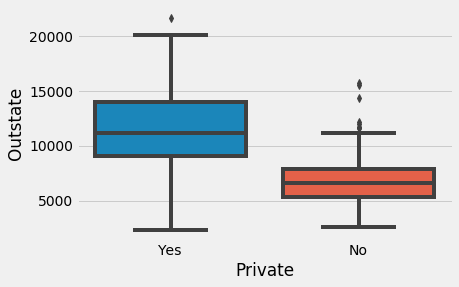

In [495]:
'''ex. iii. outstate vs private boxplot'''
fig, ax = plt.subplots()
ax = sns.boxplot(x="Private", y="Outstate", data=college)

78


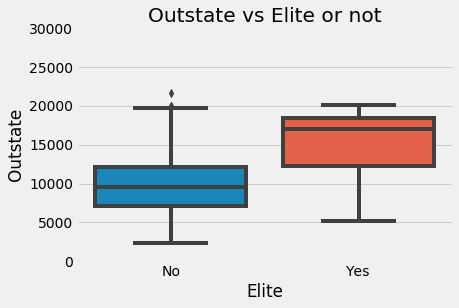

In [502]:
'''ex. iv. binning 10 perc to see how man elite universities there are where omre than 50% are top 10 perc of high schools'''
college["Elite"] = college["Top10perc"].apply(lambda x: "Yes" if x > 50 else "No")
print(college[college["Elite"]=="Yes"]["Elite"].count())

fig, ax = plt.subplots()
ax.set_ylim([0,30000])
ax.set_title("Outstate vs Elite or not")

sns.boxplot(x="Elite",y="Outstate", data=college, ax=ax)

Text(0.5, 1.0, "['Top10perc']")

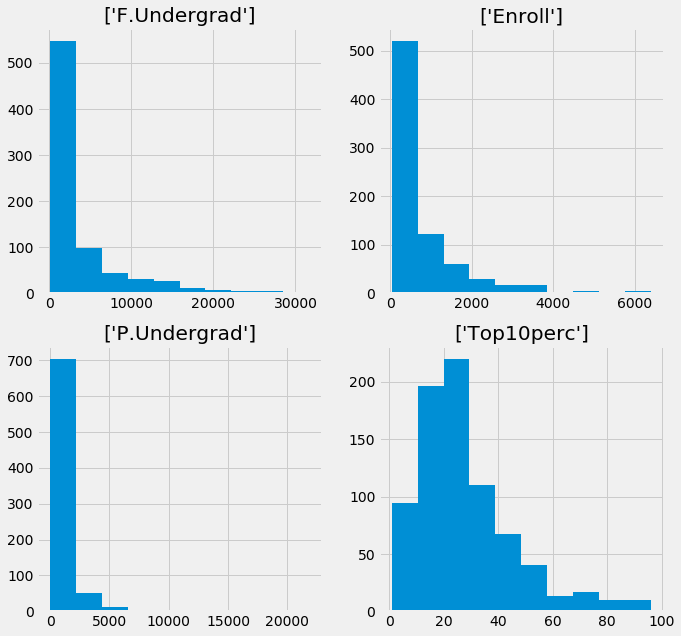

In [494]:
'''v. histograms'''
np.random.seed(42)

idx = np.random.choice(10,4)
cols = college.columns[idx]

fig, ((ax1, ax2), 
      (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))

ax1.hist(college[cols[0]])
ax2.hist(college[cols[1]])
ax3.hist(college[cols[2]])
ax4.hist(college[cols[3]])

ax1.set_title([cols[0]])
ax2.set_title([cols[1]])
ax3.set_title([cols[2]])
ax4.set_title([cols[3]])

In [300]:
print(os.listdir())

['.ipynb_checkpoints', 'Advertising.csv', 'Auto.csv', 'Boston.csv', 'Caravan.csv', 'Carseats.csv', 'Chapter 2.ipynb', 'Chapter_1.ipynb', 'College.csv', 'datalist', 'Default.csv', 'Heart.csv', 'Hitters.csv', 'Income1.csv', 'Income2.csv', 'Khan.json', 'Khan.rda', 'NCI60.json', 'NCI60.rda', 'OJ.csv', 'Portfolio.csv', 'Smarket.csv', 'Untitled.ipynb', 'Wage.csv', 'Weekly.csv']


This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data.

(a) Which of the predictors are quantitative, and which are qualitative?

(b) What is the range of each quantitative predictor? You can answer
this using the range() function.
range()

(c) What is the mean and standard deviation of each quantitative
predictor?

(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

(f) Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

In [326]:
auto = pd.read_csv("Auto.csv")
print("There are {0} NaNs".format(auto.isna().any().sum()))

quantitative = auto[["year","cylinders","year","origin"]]
quantitative.describe()

There are 0 NaNs


,year,cylinders,year,origin
count,397.000000,397.000000,397.000000,397.000000
mean,75.994962,5.458438,75.994962,1.574307
std,3.690005,1.701577,3.690005,0.802549
min,70.000000,3.000000,70.000000,1.000000
25%,73.000000,4.000000,73.000000,1.000000
50%,76.000000,4.000000,76.000000,1.000000
75%,79.000000,8.000000,79.000000,2.000000
max,82.000000,8.000000,82.000000,3.000000


In [331]:
dropped=quantitative.drop(quantitative.index[10:85], axis=0)
dropped.describe()

,year,cylinders,year,origin
count,322.000000,322.000000,322.000000,322.000000
mean,77.130435,5.378882,77.130435,1.596273
std,3.131849,1.657398,3.131849,0.815572
min,70.000000,3.000000,70.000000,1.000000
25%,75.000000,4.000000,75.000000,1.000000
50%,77.000000,4.000000,77.000000,1.000000
75%,80.000000,6.000000,80.000000,2.000000
max,82.000000,8.000000,82.000000,3.000000


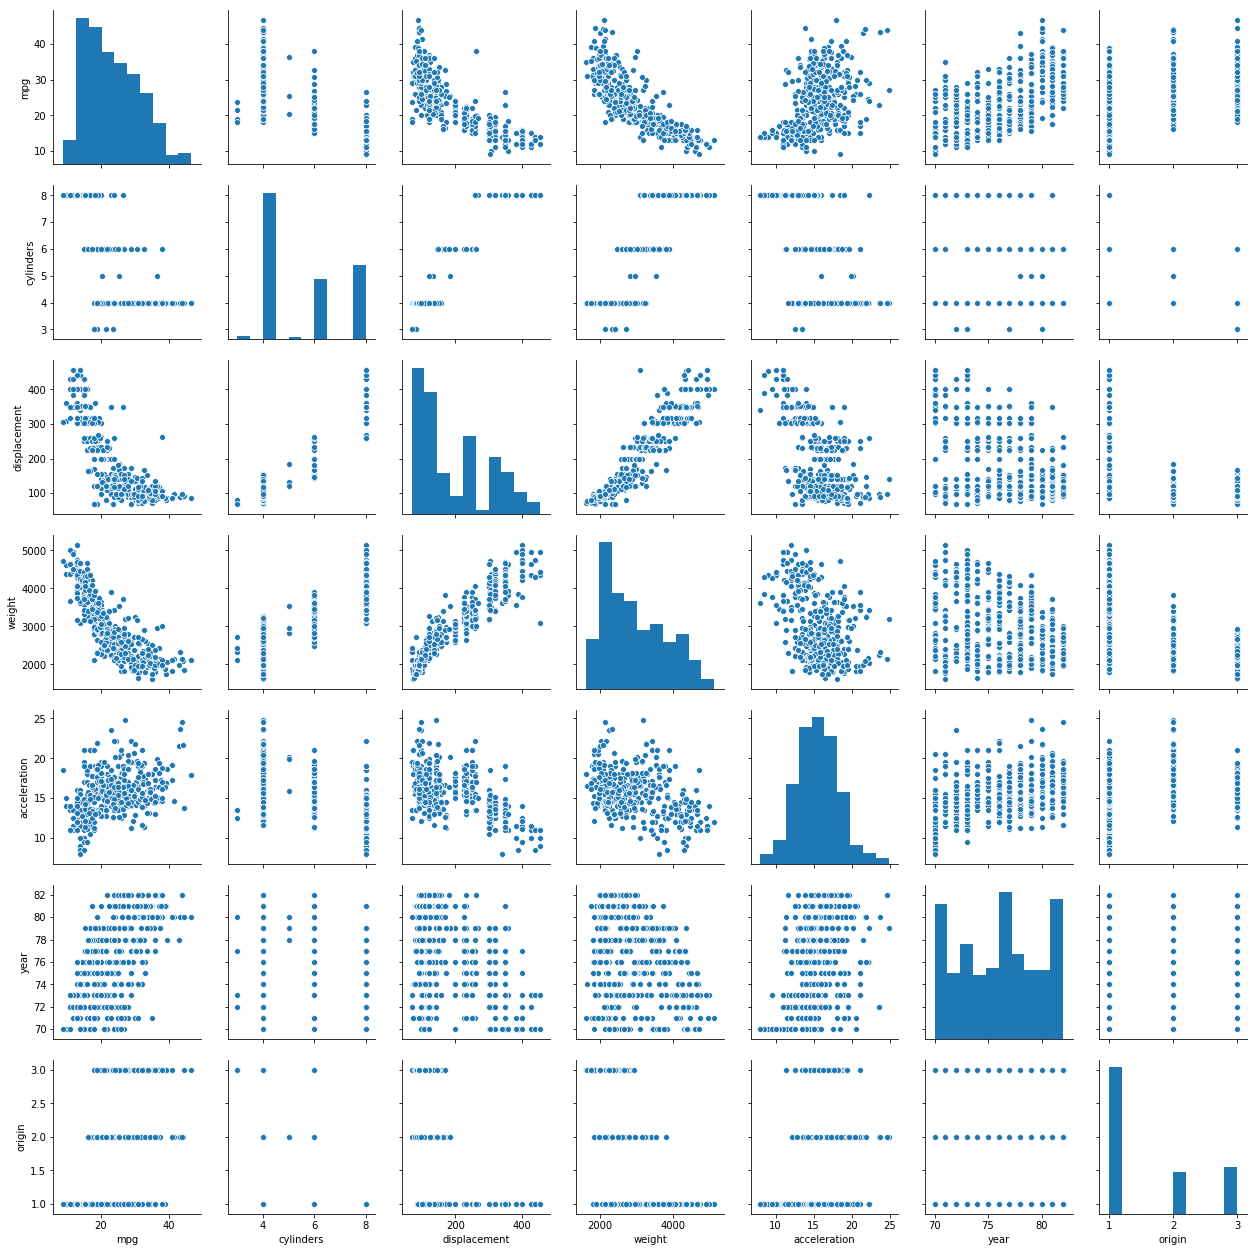

In [333]:
sns.pairplot(auto)

This exercise involves the Boston housing data set.

(a) To begin, load in the Boston data set. The Boston data set is
part of the MASS library in R.
How many rows are in this data set? How many columns? What
do the rows and columns represent?

(b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

(c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

(d) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

(e) How many of the suburbs in this data set bound the Charles
river?


(f) What is the median pupil-teacher ratio among the towns in this
data set?

(g) Which suburb of Boston has lowest median value of owneroccupied
homes? What are the values of the other predictors

for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

(h) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [423]:
from sklearn.datasets import *
boston1 = load_boston()
print(boston1["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [434]:
X = pd.DataFrame(boston1.data, columns=boston1.feature_names)
Y = pd.DataFrame(boston1.target, columns=["Price"])
print(X.head())
boston = pd.concat([X,Y], axis = 1)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [435]:
boston["district"] = boston.index

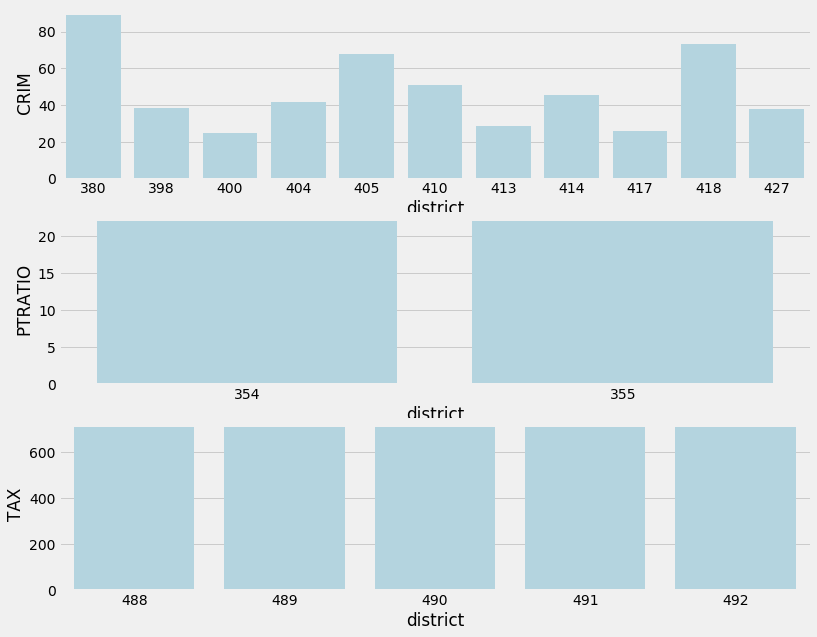

In [493]:
fig, ((ax1), (ax2), (ax3))= plt.subplots(3,1, figsize=(12,10))

crm = (np.percentile(boston["CRIM"],98))
pt = (np.percentile(boston["PTRATIO"],98))
tc = (np.percentile(boston["TAX"],98))

sns.barplot(x="district", y="CRIM", data=boston[boston["CRIM"]>crm], color="lightblue", ax=ax1)
sns.barplot(x="district", y="PTRATIO", data=boston[boston["PTRATIO"]>pt], color="lightblue", ax=ax2)
sns.barplot(x="district", y="TAX", data=boston[boston["TAX"]>tc], color="lightblue", ax=ax3)

In [437]:
print("River access of {0} districts".format(np.sum(boston["CHAS"]==1)))

River access of 35 districts


In [438]:
print("Median PT ratio is {0:.4}".format(np.mean(boston["PTRATIO"])))

Median PT ratio is 18.46


In [442]:
idx = np.argmin(boston["PTRATIO"])
print("District number {0}".format(boston.iloc[idx]["district"]))

District number 196.0


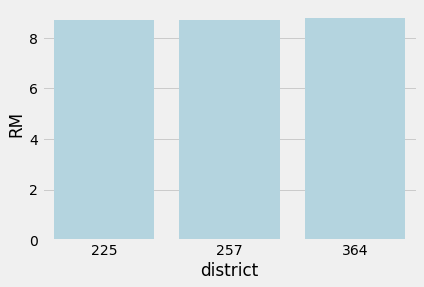

In [492]:
sns.barplot(x="district", y="RM", data = boston[boston["RM"]>8.5], color="lightblue")

In [462]:
index=((np.mean(boston[boston["CRIM"]>25], axis=0)/np.mean(boston))-1)*100

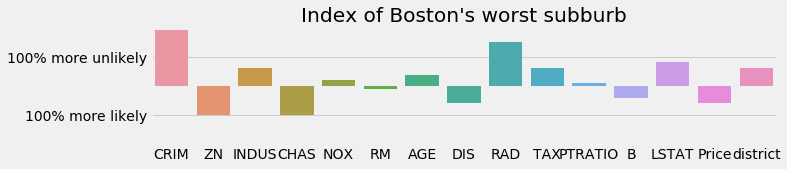

In [491]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,2))

ax.set_title("Index of Boston's worst subburb")

ax.set_ylim([-200, 200])
ax.set_yticks([-100, 100])
ax.set_yticklabels(['100% more likely', '100% more unlikely'])

sns.barplot(x=index.index, y=index, ax=ax)
